# ResNet50으로 Imagewoof 분류해보기<br>
by uramoon@kw.ac.kr

이미 훈련된 ResNet50을 불러와서 견종을 분류합니다.

이 저작물은 <a href="https://creativecommons.org/licenses/by-nc-sa/2.0/kr/">CC BY-NC-SA 2.0 KR</a>에 따라 이용할 수 있습니다. (단, 라이선스가 명시된 일부 문서 및 삽화 제외)<br>
기여하신 문서의 저작권은 각 기여자에게 있으며, 각 기여자는 기여하신 부분의 저작권을 갖습니다.<br>
Imagewoof 출처 : https://github.com/fastai/imagenette


## Imagewoof 중 일부만 압축 풀기<br>
KW_Imagewoof를 다운받아 Colab에 복사한 후 진행하세요.

In [ ]:
!unzip -q KW_imagewoof2-320.zip 

## 클래스 인덱스와 이름 알아보기<br>
KW_imagewoof2-320/n0.. 폴더에는 각 클래스에 해당하는 사진이 있습니다.<br>
(왼쪽 파일 목록을 새로고침하고 KW_imagewoof2-320 폴더를 확인해보세요.)<br><br>
ImageNet은 1,000 개의 클래스를 갖고 있는데 n0..이 
1. ImageNet에서 몇 번째 클래스에 해당하는지 
2. 사람이 식별하기 위한 이름은 어떻게 되는지 살펴봅시다.<br>
(imagenet_class_index.json 파일 활용)<br>
출처: https://github.com/raghakot/keras-vis/blob/master/resources/imagenet_class_index.json

In [ ]:
# 0번째 클래스는 n01440764인 잉어, 1번째 클래스는 n01443537인 금붕어, ...
!head imagenet_class_index.json

{"0": ["n01440764", "tench"], "1": ["n01443537", "goldfish"], "2": ["n01484850", "great_white_shark"], "3": ["n01491361", "tiger_shark"], "4": ["n01494475", "hammerhead"], "5": ["n01496331", "electric_ray"], "6": ["n01498041", "stingray"], "7": ["n01514668", "cock"], "8": ["n01514859", "hen"], "9": ["n01518878", "ostrich"], "10": ["n01530575", "brambling"], "11": ["n01531178", "goldfinch"], "12": ["n01532829", "house_finch"], "13": ["n01534433", "junco"], "14": ["n01537544", "indigo_bunting"], "15": ["n01558993", "robin"], "16": ["n01560419", "bulbul"], "17": ["n01580077", "jay"], "18": ["n01582220", "magpie"], "19": ["n01592084", "chickadee"], "20": ["n01601694", "water_ouzel"], "21": ["n01608432", "kite"], "22": ["n01614925", "bald_eagle"], "23": ["n01616318", "vulture"], "24": ["n01622779", "great_grey_owl"], "25": ["n01629819", "European_fire_salamander"], "26": ["n01630670", "common_newt"], "27": ["n01631663", "eft"], "28": ["n01632458", "spotted_salamander"], "29": ["n01632777", 

In [ ]:
import json
idx2label = []  # 인덱스를 입력하면 사람이 이해할 수 있는 이름표가 나옵니다.
cls2label = {}  # 'n02086240' 같은 것을 입력하면 사람이 이해할 수 있는 이름표가 나옵니다.
cls2idx = {}    # 'n02086240' 같은 것을 입력하면 인덱스가 나옵니다. [0, 999]: 인공신경망의 몇 번째 출력에 해당하는가

with open("imagenet_class_index.json", "r") as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}

## TODO1: 딕셔너리 활용하기<br>
아래의 두 개를 출력해보세요.

1. n02086240은 몇 번째 클래스인가? 인덱스를 출력하세요. (모델의 출력에서 사용)
2. n02086240의 클래스 이름은 무엇인가? (인간이 식별하기 편한 이름)

In [ ]:
target = 'n02086240'
# TODO: 1번과 2번의 답을 출력해보세요.
idx = cls2idx[target]
print(f"The index of {target} is {idx}")

# 해당 클래스의 이름 출력
label = cls2label[target]
print(f"The label of {target} is {label}")

The index of n02086240 is 155
The label of n02086240 is Shih-Tzu


## TODO2: 각 디렉토리에서 무작위로 5개씩 그려봅시다.<br>
총 10종의 개 이미지가 있으니 50장이 그려집니다.<br>
TODO 표시된 두 줄만 작성하시면 됩니다.

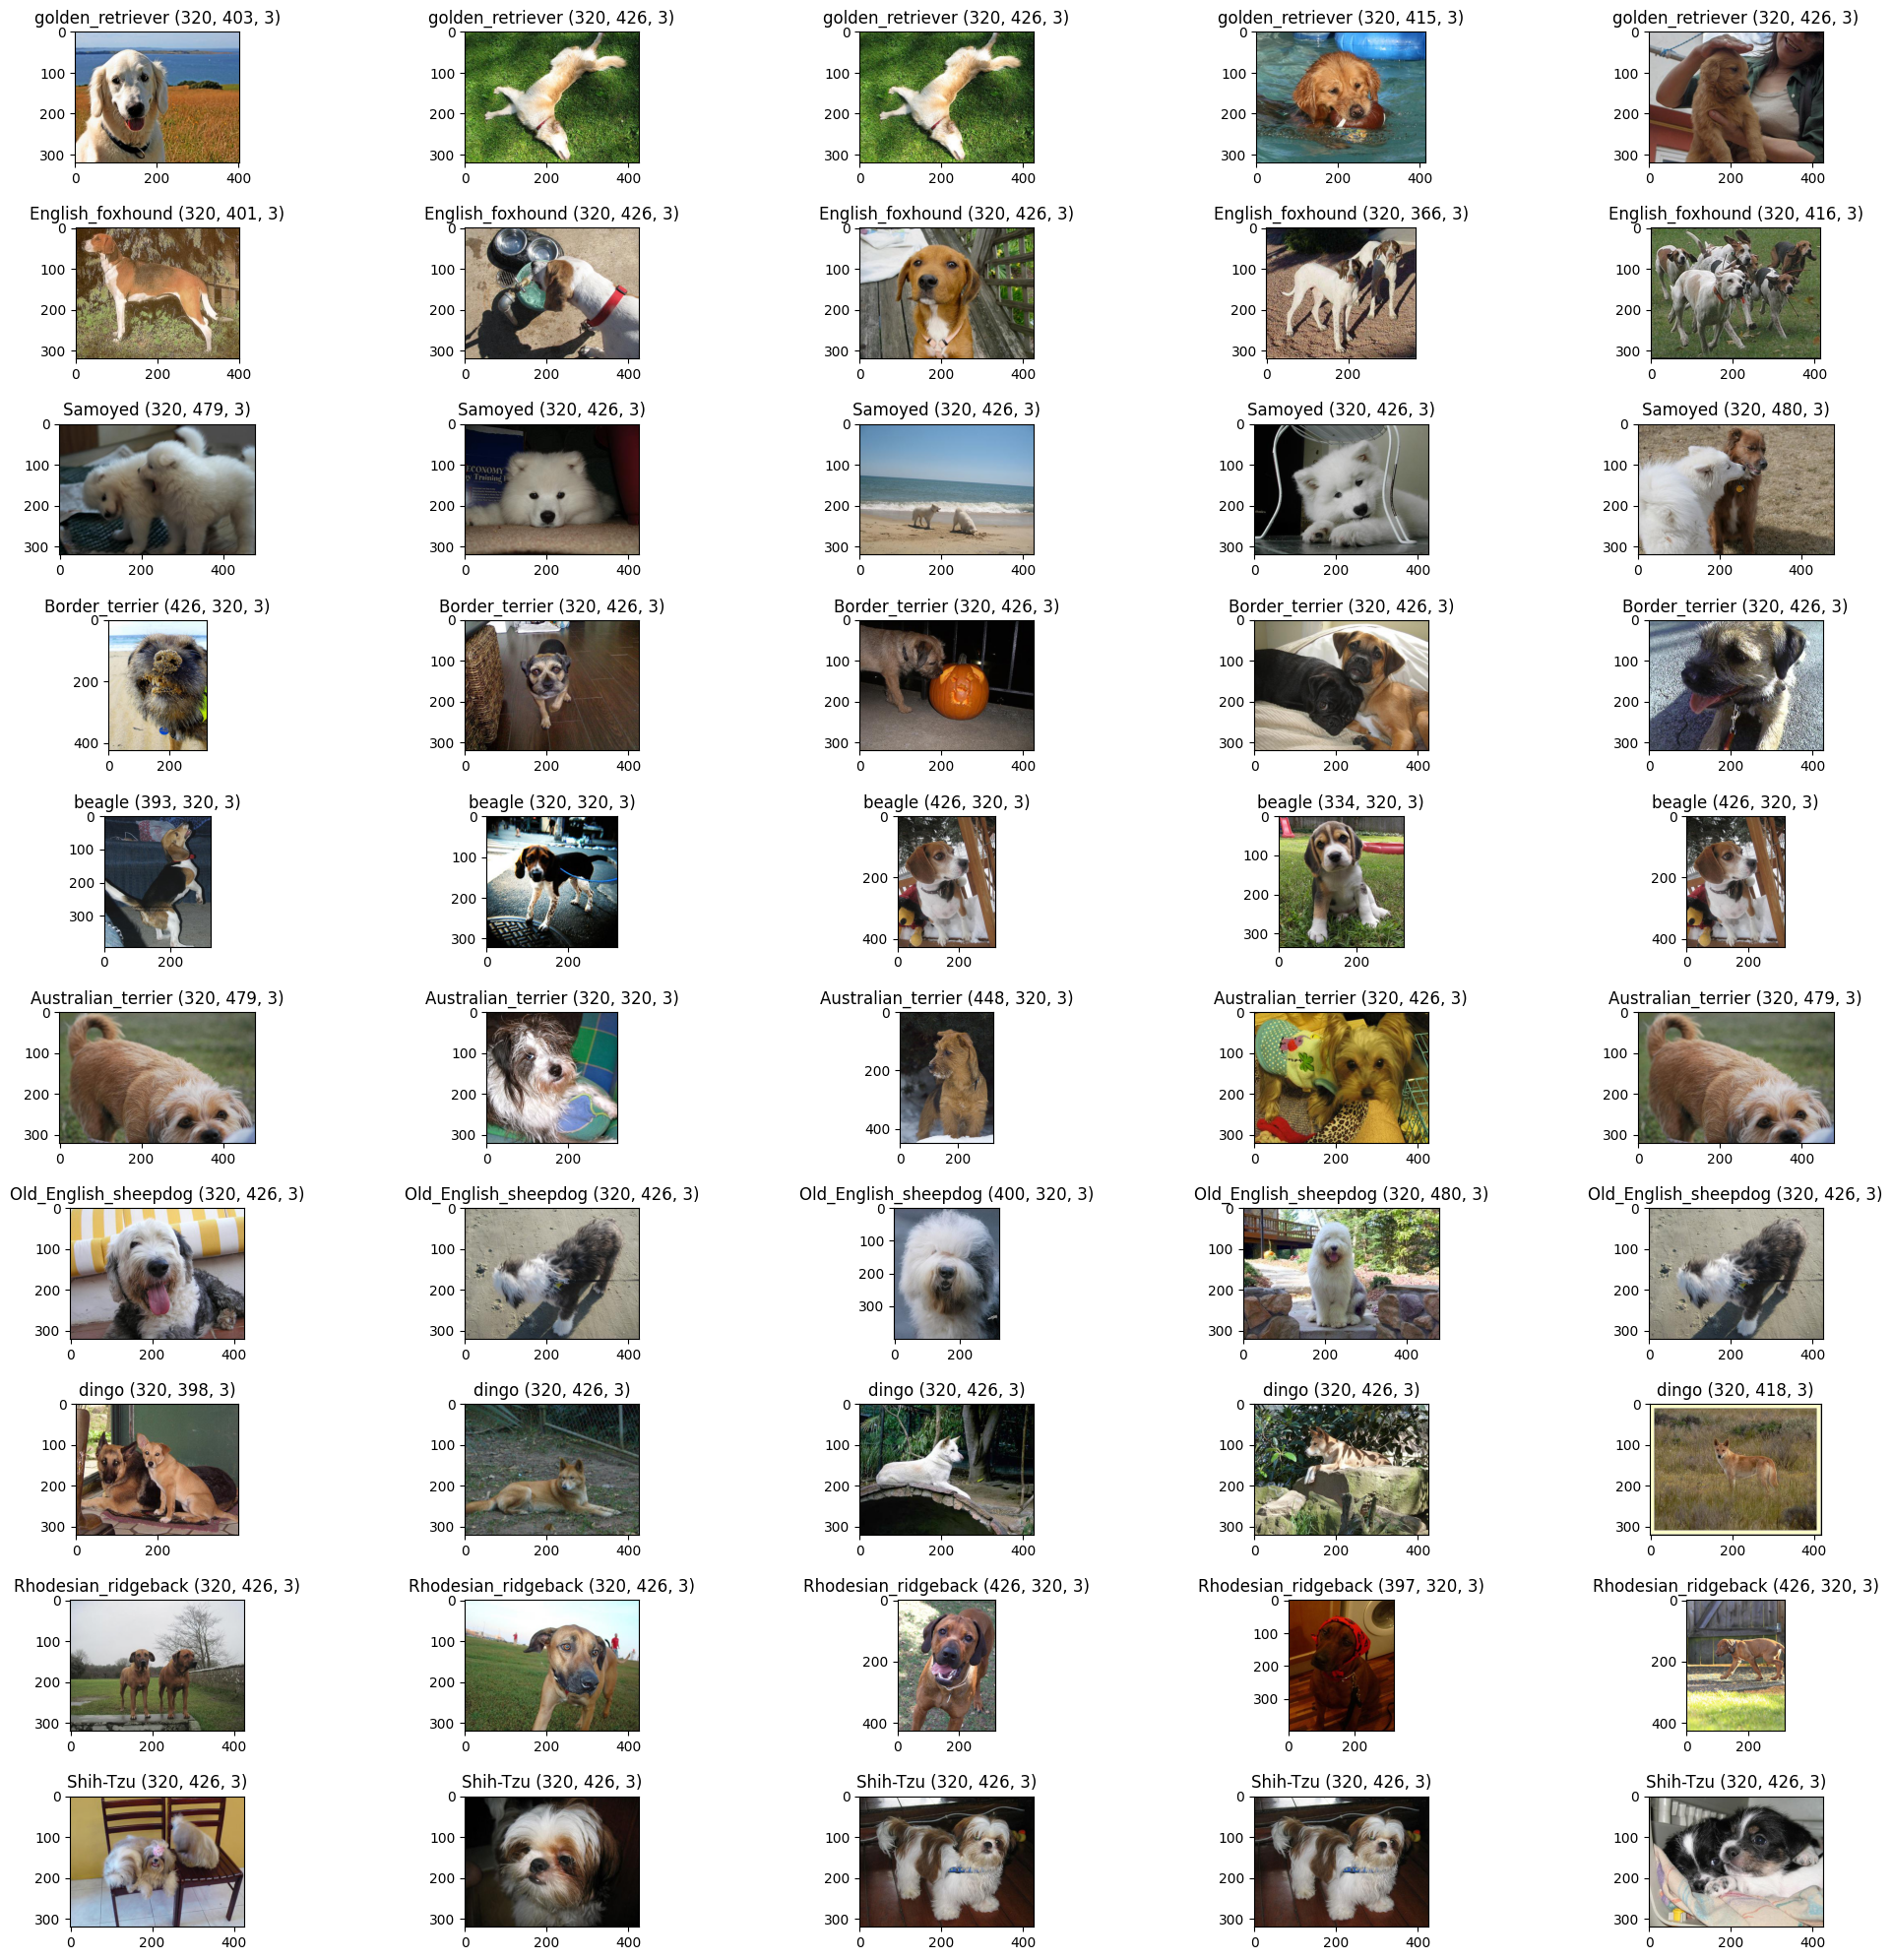

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# KW_imagewoof2-320 하위 폴더 가져오기
subfolders = [f.path for f in os.scandir('KW_imagewoof2-320') if f.is_dir()]

idx = 1
plt.figure(figsize=(25, 25))
# 각 디렉토리에서
for dir in subfolders:  
  # JPEG 파일을 5개씩 무작위로 그리기
  for i in range(5):    
    plt.subplot(10, 5, idx)
    idx = idx + 1
    rand_file = random.choice(os.listdir(dir)) # TODO: 무작위 파일 선택, Hint: Data augmentation 노트북 참조 
    img = mpimg.imread(dir + '/' + rand_file)
    # 각 그림의 제목에 클래스 이름과 그림 사이즈를 출력하세요. (예: golden_triever (높이, 너비, 채널))
    # Hint: 딕셔너리와 img.shape 활용
    # TODO: 괄호에 문자열을 넣으면 제목으로 들어감
    plt.title(f"{cls2label[dir[-9:]]} {img.shape}")
    plt.imshow(img) 
plt.subplots_adjust(hspace=0.5)    
plt.show()

## TODO3: JPEG을 224 x 224 크기의 PIL (Python Imaging Library) 이미지로 변환<br>
우리가 사용할 ResNet50은 224 x 224를 입력으로 받습니다.
1. JPEG 그려보기

In [10]:
# 다음 임의의 JPEG 이미지를 그려보세요.
fname = 'KW_imagewoof2-320/n02089973/ILSVRC2012_val_00003671.JPEG'


2. JPEG을 224 x 224 크기의 PIL image로 변환하기<br>
Hint: https://keras.io/api/preprocessing/image/ 에서 load_img 함수 사용

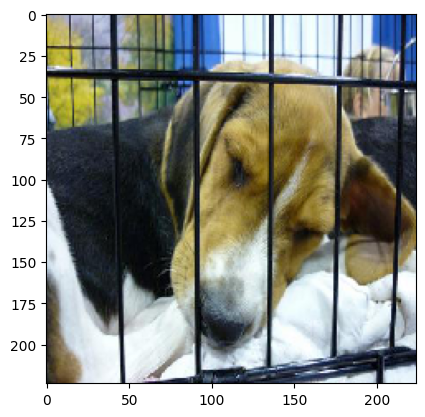

In [14]:
from tensorflow.keras.preprocessing import image

# TODO: 상기 JPEG 파일 변환해보기
img_data = image.load_img(fname, target_size=(224, 224))

# img_data 그려보기 (224 x 224로 변환됐는지 확인)
plt.imshow(img_data)  

## TODO4: PIL 이미지를 NumPy로 변환하기<br>
Hint: https://keras.io/api/preprocessing/image/ 에서 img_to_array 함수 사용 <br>
컬러 이미지의 채널이 몇 개인지 shape를 확인해보세요. 

In [16]:
# NumPy array로 변환 후 shape 확인하기
array = image.img_to_array(img_data)
array.shape

(224, 224, 3)

## TODO5: NumPy array 각 채널 그려보기<br>
채널에 따라 적절한 컬러맵을 선택하세요.<br>
https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

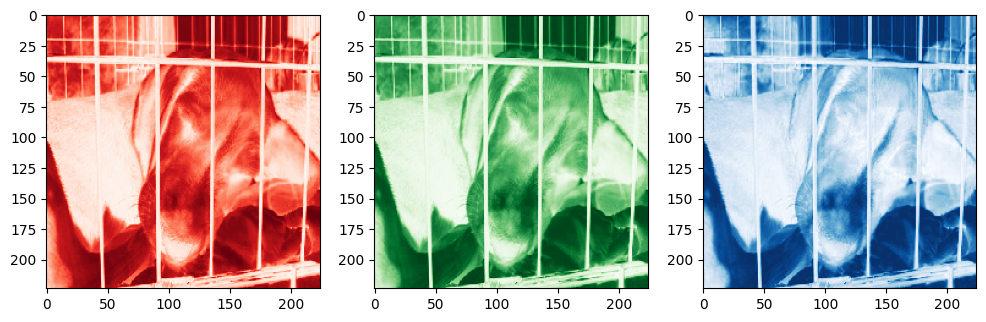

In [17]:
r_img = array[:, :, 0] # TODO: 첫 번째 채널
g_img = array[:, :, 1] # TODO: 두 번째 채널
b_img = array[:, :, 2] # TODO: 세 번째 채널

f, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
plt.sca(axarr[0])
plt.imshow(r_img, cmap='Reds')  # TODO: 첫 번째 채널
plt.sca(axarr[1])
plt.imshow(g_img, cmap='Greens')  # TODO: 두 번째 채널
plt.sca(axarr[2])
plt.imshow(b_img, cmap='Blues')  # TODO: 세 번째 채널

## TODO6: 테스트 데이터 만들기<br>
이미 훈련이 완료된 ResNet50을 사용하기 때문에 모든 그림을 테스트 데이터로 만들어 성능을 평가해볼 것입니다.<br>
KW_imagewoof2-320 폴더 아래에 있는 모든 이미지에 대해 이미지에 해당하는 NumPy 배열과 인덱스로 구성된 레이블을 만들어야 합니다.<br>
뼈대 코드를 무시하고 자유롭게 만드셔도 됩니다.




In [42]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

X_test = []
y_test = []

# KW_imagewoof2-320 하위 폴더 가져오기
subfolders = [f.path for f in os.scandir('KW_imagewoof2-320') if f.is_dir()]# TODO: 위에서 수행한 적 있습니다.

# 각 디렉토리에서
for dir in subfolders:  
  for fname in os.listdir(dir):
    # TODO: load_img를 이용해 224 x 224 PIL 이미지로 읽어오세요.
    img = image.load_img(dir + '/' + fname, target_size=(224, 224))
    # TODO: PIL 이미지를 NumPy 배열로 변환합니다.
    X = image.img_to_array(img)
    # ResNet50에서 제공하는 입력 전처리 (별도로 정규화하지 마세요.)
    X = preprocess_input(X)  
    X_test.append(X) # TODO: 리스트에 그림 하나 추가
    y_test.append(cls2idx[dir.split('/')[-1]]) # TODO: 리스트에 정답 하나 추가 (몇 번째 클래스인지 인덱스로 추가해야 함)
   
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [57]:
# Q: 다음이 의미하는 바는?
# A: (이미지 개수, 이미지 높이, 이미지 너비, 이미지 채널 수)
print(X_test.shape)

(162, 224, 224, 3)


## ResNet50 불러오기

In [37]:
import numpy as np

# 불러오기
model = ResNet50(weights='imagenet')

# 예측하기
preds = model.predict(X_test)

6/6 [==============================] - 1s 101ms/step


## TODO7: 예측 결과 살펴보기<br>
실제의 레이블과 TOP-3 레이블을 비교해보세요.<br>
Hint: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions

In [58]:
decodes = decode_predictions(preds, top=3)

for i in range(len(preds)):

  for key, value in cls2idx.items():
        if value == y_test[i]:
            actual_label = cls2label[key]
            break
  print('Actual:', actual_label, 'Predicted:', decodes[i]) # TODO: i 번째 이미지의 실제 레이블을 출력해보세요.

Actual: golden_retriever Predicted: [('n02099601', 'golden_retriever', 0.5889597), ('n02094114', 'Norfolk_terrier', 0.13876729), ('n02099712', 'Labrador_retriever', 0.10913126)]
Actual: golden_retriever Predicted: [('n02099601', 'golden_retriever', 0.99906665), ('n02099712', 'Labrador_retriever', 0.00051937596), ('n02102318', 'cocker_spaniel', 7.137419e-05)]
Actual: golden_retriever Predicted: [('n02099601', 'golden_retriever', 0.97416854), ('n02099712', 'Labrador_retriever', 0.013718901), ('n02104029', 'kuvasz', 0.0045570745)]
Actual: golden_retriever Predicted: [('n02104029', 'kuvasz', 0.4140302), ('n02099601', 'golden_retriever', 0.2655637), ('n02090622', 'borzoi', 0.24934272)]
Actual: golden_retriever Predicted: [('n02099712', 'Labrador_retriever', 0.41514787), ('n02109961', 'Eskimo_dog', 0.15082347), ('n02110185', 'Siberian_husky', 0.11777159)]
Actual: golden_retriever Predicted: [('n02099601', 'golden_retriever', 0.57263255), ('n02091831', 'Saluki', 0.2434958), ('n02088094', 'Afg

## TODO8: TOP-1 정확도를 직접 계산해봅시다.

In [59]:
correct = 0 
incorrect = 0

for i in range(len(preds)):
  actual_label = y_test[i]
  predicted_label = np.argmax(preds[i])
  if actual_label == predicted_label:
    correct += 1
  else:
    incorrect += 1
    
acc = correct / (correct + incorrect) # TODO: correct와 incorrect로 정확도 계산하여 실수값 대입
acc = "{:.2%}".format(acc)
print('Accuracy:', acc)

Accuracy: 67.90%
